In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("iris(For PCA Program).csv")

# Prepare X and Y
X = df.values[:,:-1]
Y = df.values[:,-1]

df.head()


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [49]:
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [50]:
X_standard = X - X.mean()
X_standard

array([[ 1.6355,  0.0355, -2.0645, -3.2645],
       [ 1.4355, -0.4645, -2.0645, -3.2645],
       [ 1.2355, -0.2645, -2.1645, -3.2645],
       [ 1.1355, -0.3645, -1.9645, -3.2645],
       [ 1.5355,  0.1355, -2.0645, -3.2645],
       [ 1.9355,  0.4355, -1.7645, -3.0645],
       [ 1.1355, -0.0645, -2.0645, -3.1645],
       [ 1.5355, -0.0645, -1.9645, -3.2645],
       [ 0.9355, -0.5645, -2.0645, -3.2645],
       [ 1.4355, -0.3645, -1.9645, -3.3645],
       [ 1.9355,  0.2355, -1.9645, -3.2645],
       [ 1.3355, -0.0645, -1.8645, -3.2645],
       [ 1.3355, -0.4645, -2.0645, -3.3645],
       [ 0.8355, -0.4645, -2.3645, -3.3645],
       [ 2.3355,  0.5355, -2.2645, -3.2645],
       [ 2.2355,  0.9355, -1.9645, -3.0645],
       [ 1.9355,  0.4355, -2.1645, -3.0645],
       [ 1.6355,  0.0355, -2.0645, -3.1645],
       [ 2.2355,  0.3355, -1.7645, -3.1645],
       [ 1.6355,  0.3355, -1.9645, -3.1645],
       [ 1.9355, -0.0645, -1.7645, -3.2645],
       [ 1.6355,  0.2355, -1.9645, -3.0645],
       [ 1

In [51]:
type(X_standard)

numpy.ndarray

In [52]:
Y_standard = Y
Y_standard

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [53]:
type(Y_standard)

numpy.ndarray

In [54]:
cov = np.cov(X.T)   # .T b/c numpy wants varibles along rows rather than down columns?
print("covariance matrix =\n",cov)

covariance matrix =
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [55]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(cov)

In [56]:
eigenvalues

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [57]:
eigenvectors

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [58]:
sorted_index=np.argsort(eigenvalues)[::-1]
eigenvalues=eigenvalues[sorted_index]
eigenvectors=eigenvectors[:,sorted_index]

In [66]:
eigenvectors

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [67]:
 #you can select any number of components.
eigenvector_subset = eigenvectors[:,:2]

In [68]:
eigenvector_subset

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [69]:
X_reduced = np.dot(eigenvector_subset.transpose(),X.transpose()).transpose()

In [70]:
print("Information/Variance in PC1",(eigenvalues[0]/(eigenvalues[0]+eigenvalues[1]))*100)

Information/Variance in PC1 94.57223216899484


In [71]:
X_reduced

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709],
       [ 3.2215055 , -6.06828303],
       [ 2.68182738, -5.23749119],
       [ 2.87622016, -5.49033754],
       [ 2.6159824 , -4.74864082],
       [ 2.82960933, -5.21317833],
       [ 2.99541804, -5.97202148],
       [ 2.8896099 , -5.34168252],
       [ 2.71625587, -5.09184058],
       [ 2.27856139, -4.81555799],
       [ 2.85761474, -6.50571721],
       [ 3.1163261 , -6.66501491],
       [ 2.87883726, -6.13763209],
       [ 2.85406843, -5.63880172],
       [ 3.30254481, -6.19979162],
       [ 2.91437873, -5.84051289],
       [ 3.19210892, -5.71829851],
       [ 2.9586599 , -5.75994864],
       [ 2.28642572, -5.46042065],
       [ 3.19963195, -5.42566143],
       [ 3.14661108, -5.28967072],
       [ 2.99569623, -5.1809357 ],
       [ 3.03354506, -5.45790407],
       [ 2.94004523, -5.69467143],
       [ 2.86283042,

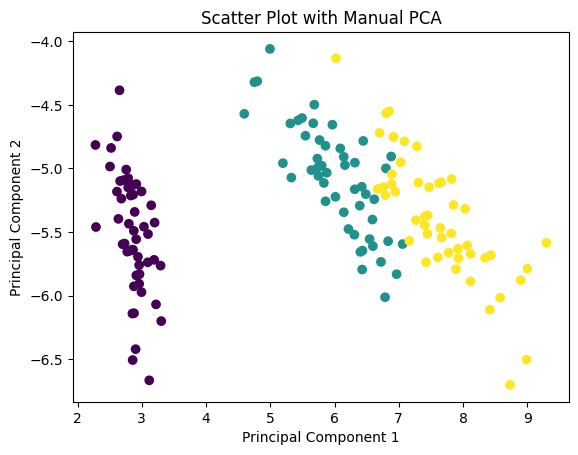

In [72]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)
plt.title('Scatter Plot with Manual PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
